In [1]:
# prompt: GOOGLE DRIVE MOUNT

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

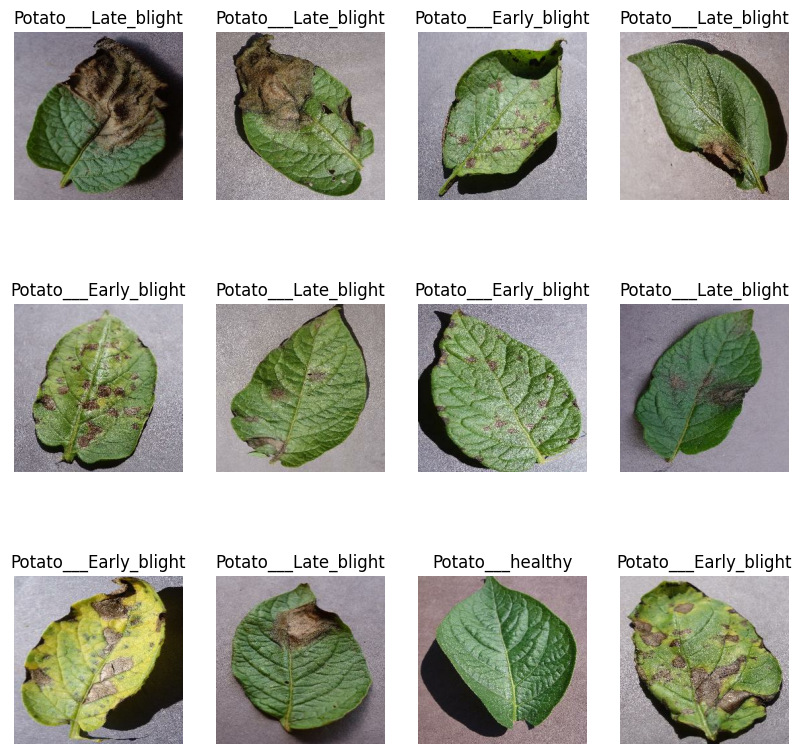

In [ ]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1) :
    for i in range(12) :
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test

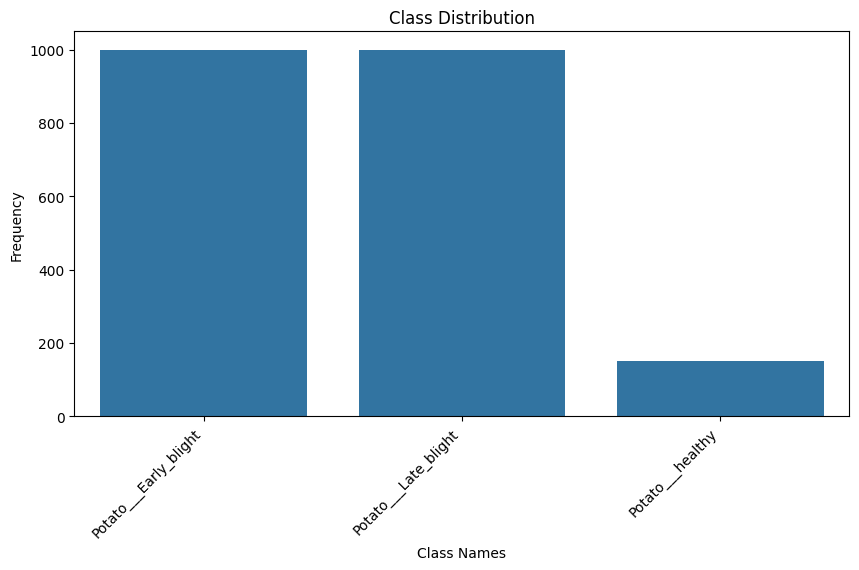

In [ ]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Get the labels from the dataset
labels = []
for _, label_batch in dataset.as_numpy_iterator():
    labels.extend(label_batch.tolist()) # Convert numpy arrays to single values by extending the labels with all values in the label batch

# Count the frequency of each label
label_counts = Counter(labels)

# Create a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45, ha='right')
plt.xlabel("Class Names")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

**Import Libraries and Set Up Paths**

In [ ]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Replace with the path to your "healthy" folder in Drive
healthy_dir = "/content/drive/MyDrive/PlantVillage/Potato___healthy"

# Make sure the directory exists
assert os.path.exists(healthy_dir), "Healthy folder path does not exist."

**Check How Many Images Already Exist**

In [ ]:
# Gather all image filenames in the healthy folder
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
healthy_images = [
    f for f in os.listdir(healthy_dir)
    if f.lower().endswith(valid_extensions)
]

current_count = len(healthy_images)
print(f"Currently, there are {current_count} images in the Healthy folder.")

Currently, there are 1000 images in the Healthy folder.


**Define Target Count and Data Augmentation**

In [ ]:
target_count = 1000  # desired total images for "Healthy"
to_generate = target_count - current_count

# Define a data generator with some augmentations
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


**Augment and Save Images**

In [ ]:
import uuid
if to_generate > 0:
    print(f"Generating {to_generate} augmented images...")

    # Function to augment a single image and save the result
    def augment_image(image_path, save_dir):
      img = load_img(image_path)            # Load the image
      x = img_to_array(img)                 # Convert to numpy array
      x = np.expand_dims(x, axis=0)         # Add batch dimension

      # Generate a unique prefix for this augmentation
      unique_prefix = f"aug_{uuid.uuid4().hex[:8]}"

      # Generate a batch of augmented images (we only need one)
      aug_iter = datagen.flow(
        x,
        batch_size=1,
        save_to_dir=save_dir,
        save_prefix=unique_prefix,  # Use unique prefix
        save_format="jpg"           # Save format
    )

      # Generate exactly 1 augmented image using the built-in next()
      next(aug_iter)


    for i in range(to_generate):
        # Pick a random image from the existing healthy set
        random_img = random.choice(healthy_images)
        random_img_path = os.path.join(healthy_dir, random_img)

        # Generate and save 1 augmented image
        augment_image(random_img_path, healthy_dir)

    print("Augmentation complete.")
else:
    print("No augmentation needed; you already have 1000 or more images.")


No augmentation needed; you already have 1000 or more images.


**Confirm the Final Count**

In [ ]:
# Re-check how many images are now in the folder
healthy_images_after = [
    f for f in os.listdir(healthy_dir)
    if f.lower().endswith(valid_extensions)
]

print(f"After augmentation, there are {len(healthy_images_after)} images in the Healthy folder.")

After augmentation, there are 1000 images in the Healthy folder.


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3000 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

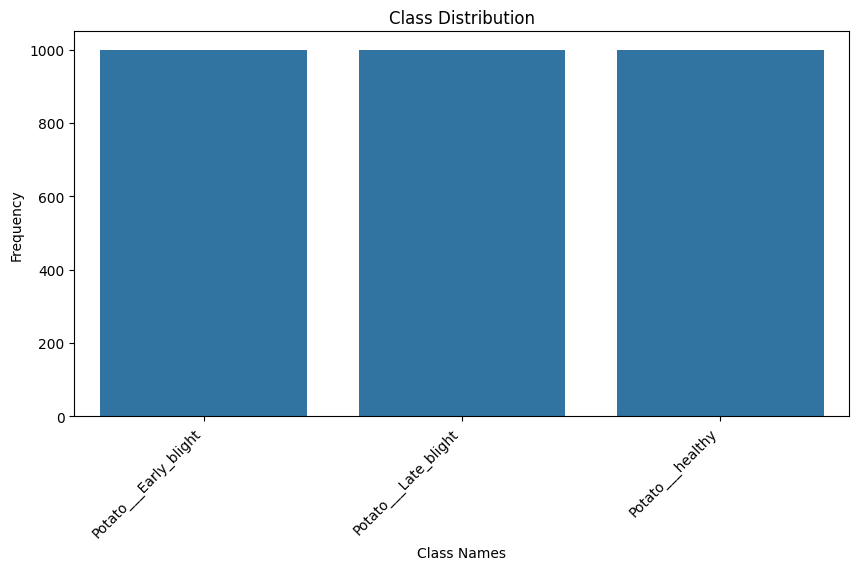

In [ ]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Get the labels from the dataset
labels = []
for _, label_batch in dataset.as_numpy_iterator():
    labels.extend(label_batch.tolist()) # Convert numpy arrays to single values by extending the labels with all values in the label batch

# Count the frequency of each label
label_counts = Counter(labels)

# Create a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45, ha='right')
plt.xlabel("Class Names")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

In [ ]:
len(dataset)

94

In [ ]:
train_size = 0.8
len(dataset)*train_size

75.2

In [ ]:
train_ds = dataset.take(75)
len(train_ds)

75

In [ ]:
test_ds = dataset.skip(75)
len(test_ds)

19

In [ ]:
validation_size = 0.1
len(dataset) * validation_size

9.4

In [ ]:
val_ds = test_ds.take(9)
len(val_ds)

9

In [ ]:
test_ds = test_ds.skip(9)
len(test_ds)

10

In [ ]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000) :
    """Splitting datasets in train set, validation set and test set"""
    ds_size = len(ds)
    if shuffle :
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

75
9
10


In [ ]:
"""
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)  #this will read image from disk and then for next iteration when we need the image it will keep that image in the memory
#improves performance of our pipeline
#pretech will load the next set of batch from our disk when if GPU is busy training; improving performance
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
"""

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)  # No shuffling needed
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)  # No shuffling needed


In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

#Data augmentation is a technique used in machine learning, particularly in computer vision tasks,
#to artificially increase the diversity of the training dataset.
#By applying random transformations to the images, data augmentation helps improve the robustness and generalization ability of a model.

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])

model.build(input_shape = input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 2304)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 64)                    │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
EPOCHS = 50

In [ ]:
"""
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',     # Monitor the validation loss
    patience=5,             # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

# Train the model with the early stopping callback
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    callbacks=[early_stop]
)
"""

from tensorflow.keras.callbacks import EarlyStopping

# Early stopping if val_loss stops improving
early_stop_loss = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

# Early stopping if val_accuracy stops improving
early_stop_acc = EarlyStopping(
    monitor='val_accuracy',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    callbacks=[early_stop_loss, early_stop_acc]
)


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 174ms/step - accuracy: 0.4212 - loss: 1.0297 - val_accuracy: 0.7639 - val_loss: 0.5686
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8742 - loss: 0.2973 - val_accuracy: 0.8681 - val_loss: 0.3083
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9058 - loss: 0.2411 - val_accuracy: 0.9201 - val_loss: 0.2103
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9422 - loss: 0.1583 - val_accuracy: 0.9167 - val_loss: 0.2329
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9527 - loss: 0.1447 - val_accuracy: 0.7951 - val_loss: 0.7112
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9385 - loss: 0.1779 - val_accuracy: 0.9167 - val_loss: 0.2130
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9415 - loss: 0.1778 - val_accuracy: 0.8993 - val_loss: 0.2425
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9689 - loss: 0.0880 - val_accuracy: 0.9375 -

In [ ]:
scores = model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9914 - loss: 0.0216


In [ ]:
scores

[0.012403941713273525, 0.996874988079071]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 75}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
history.history['accuracy']

[0.557692289352417,
 0.8670568466186523,
 0.9193143844604492,
 0.943561851978302,
 0.957775890827179,
 0.9502508640289307,
 0.9452341198921204,
 0.9728260636329651,
 0.9627926349639893,
 0.9732441306114197,
 0.9715719223022461,
 0.989130437374115,
 0.9849498271942139,
 0.97826087474823,
 0.989130437374115,
 0.9740802645683289,
 0.9903846383094788,
 0.9870401620864868,
 0.9803511500358582,
 0.9849498271942139,
 0.9916387796401978,
 0.9945651888847351,
 0.9912207126617432,
 0.9719899892807007,
 0.9841136932373047,
 0.9933110475540161,
 0.9924749135971069]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

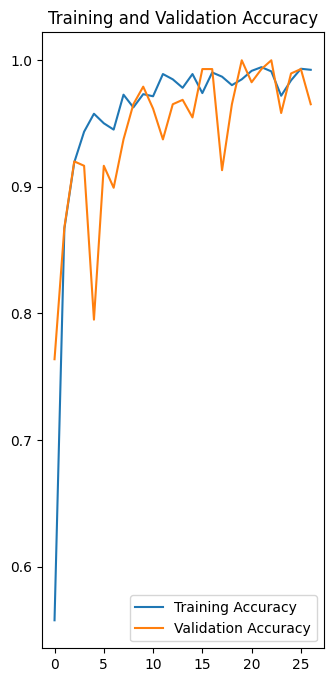

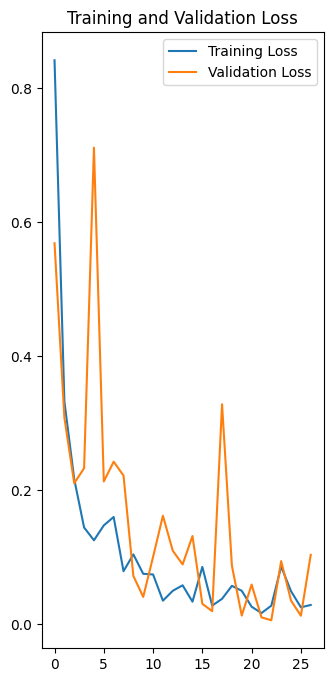

In [ ]:
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(27), acc, label = 'Training Accuracy')
plt.plot(range(27), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(27), loss, label = 'Training Loss')
plt.plot(range(27), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np

y_true = np.concatenate([y for x, y in test_ds], axis=0)


In [ ]:
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

Confusion Matrix:
 [[113   0   0]
 [  1 105   0]
 [  0   0 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       113
           1       1.00      0.99      1.00       106
           2       1.00      1.00      1.00       101

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



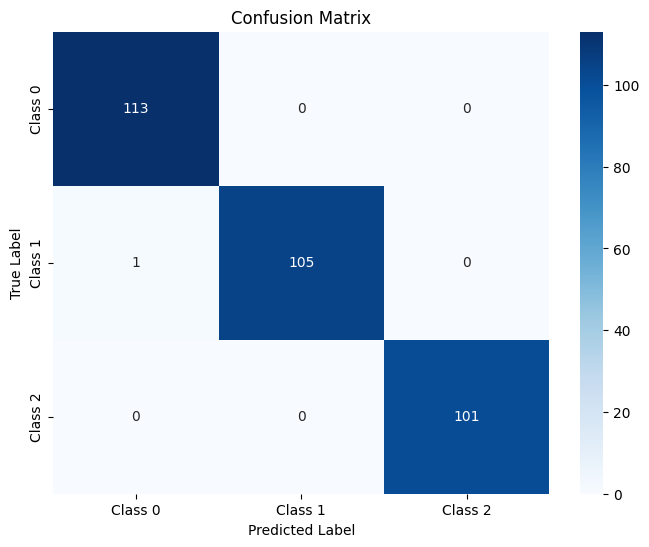

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are defined
cm = confusion_matrix(y_true, y_pred)
class_names = ['Class 0', 'Class 1', 'Class 2']  # Replace with your actual class names

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np

def sensitivity_per_class(confusion_matrix):
    """
    This function calculates the sensitivity (also known as recall)
    for each class from the confusion matrix.

    A confusion matrix is a table that shows:
    - How many items are correctly identified (true positives)
      for each class (the diagonal values), and
    - How many items are missed (false negatives) for each class
      (the rest of the row values).

    Sensitivity (Recall) for a class is calculated as:
       Sensitivity = (True Positives) / (True Positives + False Negatives)
    It tells us what percentage of the actual items in that class were correctly recognized.
    """
    sensitivities = []  # This will store the sensitivity for each class
    # Loop over each class (each row in the confusion matrix)
    for i in range(len(confusion_matrix)):
        true_positives = confusion_matrix[i, i]  # The correct predictions for this class
        false_negatives = np.sum(confusion_matrix[i, :]) - true_positives  # All items that were in this class but not predicted correctly
        sensitivity = true_positives / (true_positives + false_negatives)
        sensitivities.append(sensitivity)
    return sensitivities

# Define a confusion matrix.
# Rows represent the actual class, and columns represent the predicted class.
# For example, for Class 0:
#  - 106 items were correctly predicted as Class 0.
#  - 1 item was wrongly predicted as Class 1.
#  - 1 item was wrongly predicted as Class 2.
confusion_matrix = np.array([
    [113,   0,   0],
    [  1, 105,   0],
    [  0,   0, 101]
])

# Calculate sensitivity (recall) for each class
sensitivities = sensitivity_per_class(confusion_matrix)

# Print the results in a user-friendly way
for i, sensitivity in enumerate(sensitivities):
    print(f"Sensitivity (Recall) for Class {i}: {sensitivity * 100:.2f}%")


Sensitivity (Recall) for Class 0: 100.00%
Sensitivity (Recall) for Class 1: 99.06%
Sensitivity (Recall) for Class 2: 100.00%


In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1) :

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label :", class_names[first_label])

    batch_prediction = model.predict(images_batch) #prediction for 32 images
    print("Predicted label :", class_names[np.argmax(batch_prediction[0])])  #softmax is a probability; and there are 3 probabilities
    #whatever is the highest probability; that is the class
    #np.argmax gies the index of the highest value



In [ ]:
def predict(model, img) :
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


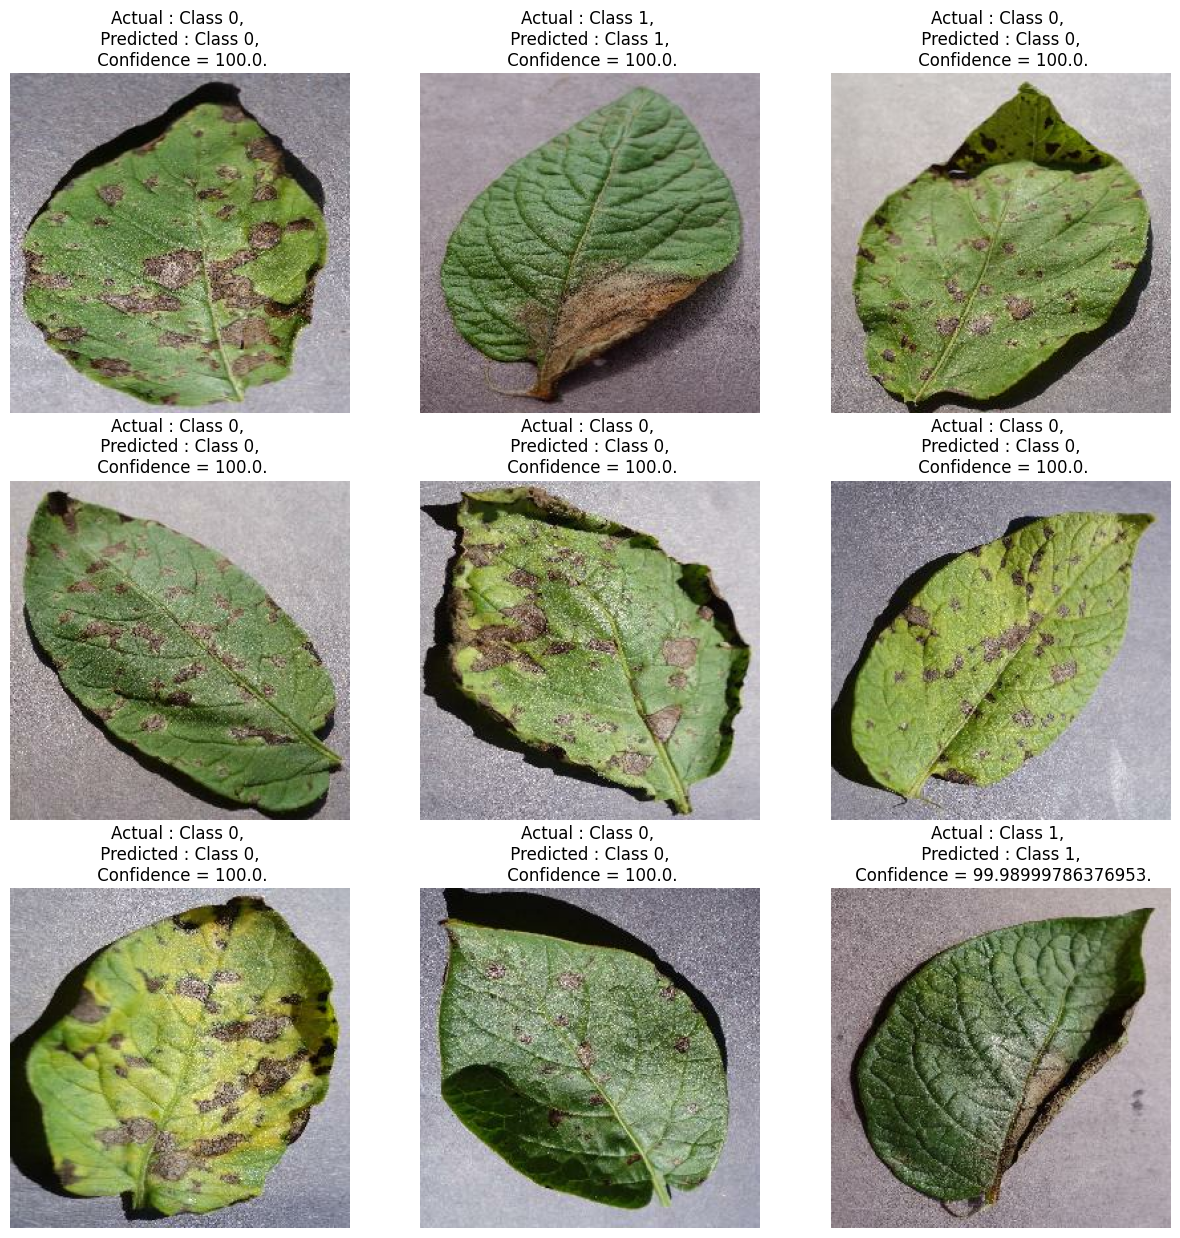

In [ ]:
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1) :
    for i in range(9) :
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual : {actual_class}, \n Predicted : {predicted_class}, \n Confidence = {confidence}.")

        plt.axis("off")

In [ ]:
feature_extractor = tf.keras.Model(
    inputs=model.inputs,
    outputs=model.layers[-3].output  # e.g., the Flatten layer
)

In [ ]:
import numpy as np

def extract_features(dataset, feature_model):
    features_list = []
    labels_list = []
    for images, labels in dataset:
        # Predict to get the intermediate layer output
        batch_features = feature_model.predict(images)
        features_list.append(batch_features)
        labels_list.append(labels.numpy())
    # Combine all batches
    X = np.concatenate(features_list, axis=0)
    y = np.concatenate(labels_list, axis=0)
    return X, y

# Extract features for train, val, test sets
X_train, y_train = extract_features(train_ds, feature_extractor)
X_val, y_val = extract_features(val_ds, feature_extractor)
X_test, y_test = extract_features(test_ds, feature_extractor)

print("Feature shapes:", X_train.shape, y_train.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_44']
Received: inputs=Tensor(shape=(32, 256, 256, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_44']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

In [ ]:
import numpy as np

np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

In [ ]:
import numpy as np

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')


Random Forest Validation Accuracy: 0.9965277777777778
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.99      1.00      1.00       113
           2       1.00      1.00      1.00        89

    accuracy                           1.00       288
   macro avg       1.00      1.00      1.00       288
weighted avg       1.00      1.00      1.00       288



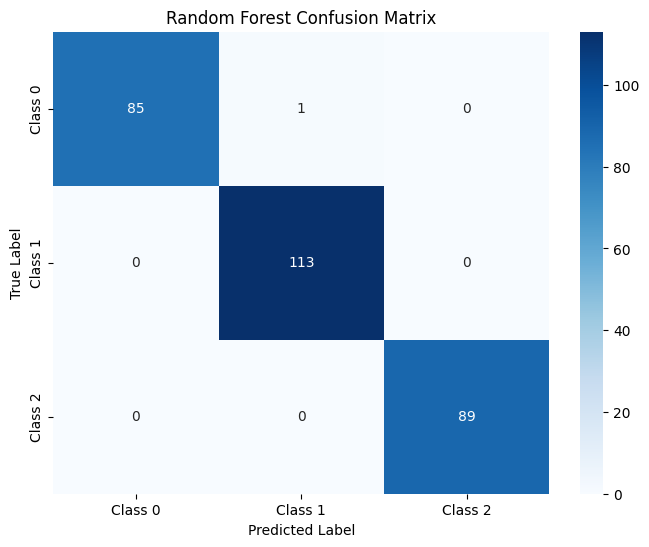

SVM Validation Accuracy: 0.9930555555555556
Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      0.98      0.99       113
           2       0.98      1.00      0.99        89

    accuracy                           0.99       288
   macro avg       0.99      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288



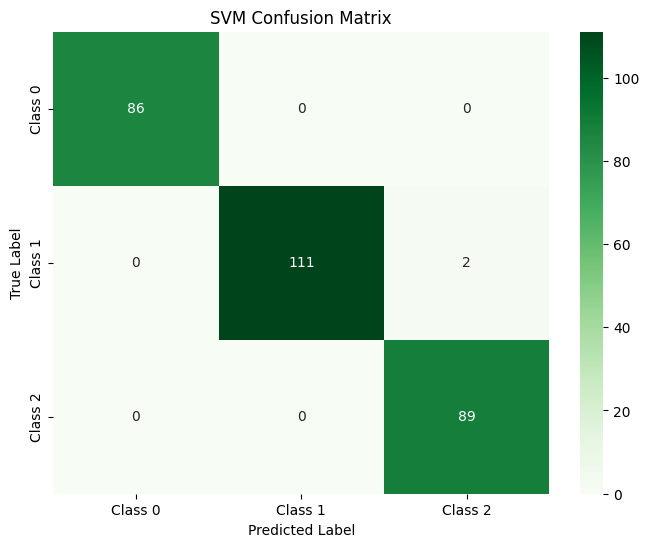

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 2.1 Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate on validation set for Random Forest
rf_val_preds = rf_clf.predict(X_val)
rf_val_acc = accuracy_score(y_val, rf_val_preds)
print("Random Forest Validation Accuracy:", rf_val_acc)
print("Classification Report for Random Forest:")
print(classification_report(y_val, rf_val_preds))

# Compute and plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_val, rf_val_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"Class {i}" for i in range(n_classes)],
            yticklabels=[f"Class {i}" for i in range(n_classes)])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ------------------------------
# 2.2 SVM
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Evaluate on validation set for SVM
svm_val_preds = svm_clf.predict(X_val)
svm_val_acc = accuracy_score(y_val, svm_val_preds)
print("SVM Validation Accuracy:", svm_val_acc)
print("Classification Report for SVM:")
print(classification_report(y_val, svm_val_preds))

# Compute and plot confusion matrix for SVM
cm_svm = confusion_matrix(y_val, svm_val_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=[f"Class {i}" for i in range(n_classes)],
            yticklabels=[f"Class {i}" for i in range(n_classes)])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Random Forest Test Accuracy: 1.0
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00       101

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



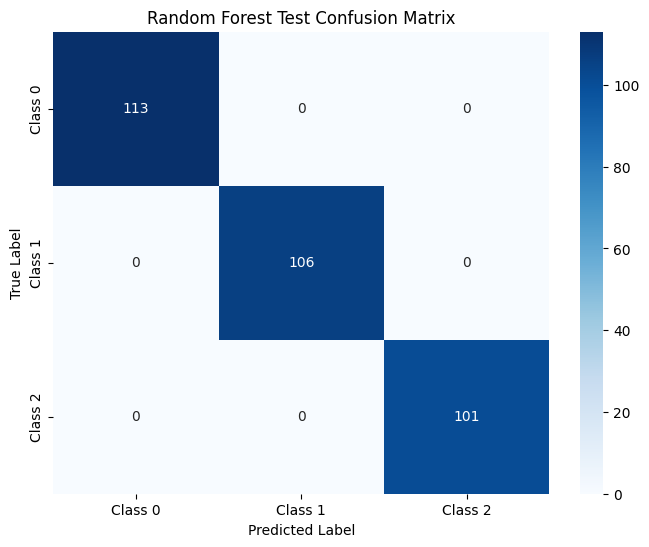

SVM Test Accuracy: 1.0
Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00       101

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



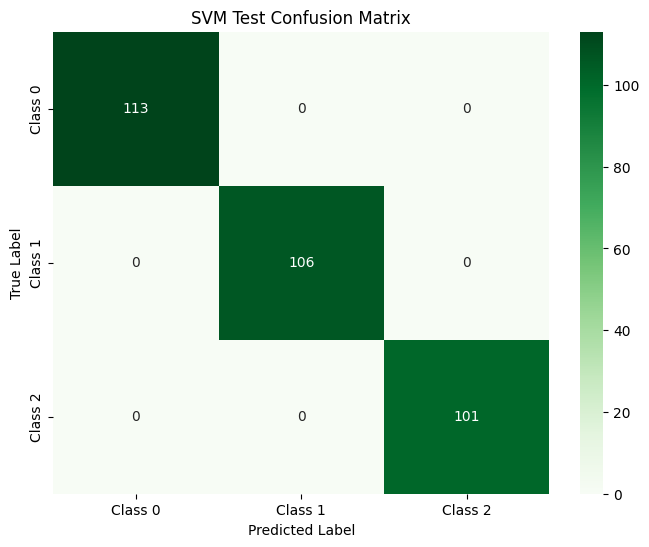

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Evaluate Random Forest on Test Set
rf_test_preds = rf_clf.predict(X_test)
rf_test_acc = accuracy_score(y_test, rf_test_preds)
print("Random Forest Test Accuracy:", rf_test_acc)
print("Classification Report (Random Forest):\n", classification_report(y_test, rf_test_preds))

# Compute and plot confusion matrix for Random Forest
cm_rf_test = confusion_matrix(y_test, rf_test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"Class {i}" for i in range(n_classes)],
            yticklabels=[f"Class {i}" for i in range(n_classes)])
plt.title("Random Forest Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ------------------------------
# Evaluate SVM on Test Set
svm_test_preds = svm_clf.predict(X_test)
svm_test_acc = accuracy_score(y_test, svm_test_preds)
print("SVM Test Accuracy:", svm_test_acc)
print("Classification Report (SVM):\n", classification_report(y_test, svm_test_preds))

# Compute and plot confusion matrix for SVM
cm_svm_test = confusion_matrix(y_test, svm_test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=[f"Class {i}" for i in range(n_classes)],
            yticklabels=[f"Class {i}" for i in range(n_classes)])
plt.title("SVM Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
import os
model_version = max([int(i) for i in os.listdir("/content/drive/MyDrive/MODEL") + [0]]) + 1 #autoincrement the number of directories on saving different versions of models
model.export(f"/content/drive/MyDrive/MODEL{model_version}")

#ran this 3 times for the sake of experiment; the versions are same that are stored in the models directory; will change some things for tomato

Saved artifact at '/content/drive/MyDrive/MODEL1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138617387929232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138617387928848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138620754406736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138620754406544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138616606600144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138616606597648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138616606600528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138616606594192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138616606600720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138616606593232: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
save_dir = '/content/drive/My Drive/MODEL'
model_save_path = os.path.join(save_dir, 'model_100_BALANCED.h5')
model.save(model_save_path)  # This saves in the TensorFlow SavedModel format

# Experiment 2 with PLD Dataset

In this experiment, we perform a comprehensive study on the PLD dataset by following these steps:

1. **Data Augmentation:**  
   We check if the Healthy folder contains 1000+ images. If not, we generate augmented images using `ImageDataGenerator` to increase the dataset size.

2. **Class Distribution Analysis:**  
   We plot a bar chart showing the distribution of samples across different classes to understand the class balance.

3. **Dataset Split:**  
   The dataset is divided into training, validation, and test sets.

4. **Model Creation:**  
   A Convolutional Neural Network (CNN) is built using TensorFlow and Keras for image classification.

5. **Model Training:**  
   The CNN is trained using the training set with validation monitoring and early stopping to prevent overfitting.

6. **Model Evaluation:**  
   The performance of the trained CNN is evaluated on the test set.

7. **Confusion Matrix:**  
   A confusion matrix is generated and plotted to visualize the model's performance on the test set.

8. **Sensitivity Calculation:**  
   We calculate the sensitivity (recall) of the model for each class to determine how well the model identifies true positives.

9. **Prediction on Test Images:**  
   We predict the class of images from the test set and visualize some predicted images along with their actual and predicted classes and confidence scores.

10. **Feature Extraction:**  
    Features are extracted from a specific layer (e.g., the Flatten layer) of the CNN. These features and corresponding labels are saved as `.npy` files, which can later be loaded for further analysis.

11. **Random Forest and SVM Classification:**  
    The saved CNN features are used to train both Random Forest and SVM classifiers. Their performance is evaluated on the validation set, and confusion matrices are generated for each.

12. **Evaluation on Test Set for Random Forest and SVM:**  
    The performance of both the Random Forest and SVM classifiers is evaluated on the test set, with corresponding confusion matrices plotted.

13. **Model Saving:**  
    The trained CNN model is saved in the TensorFlow SavedModel format with an incremented version number for future use.

This experiment aims to compare the performance of an end-to-end CNN with classical machine learning models (Random Forest and SVM) that leverage CNN-extracted features, providing a thorough analysis of the PLD dataset.

In [3]:
IMAGE_SIZE_exp2 = 256
BATCH_SIZE_exp2 = 32
CHANNELS_exp2 = 3

#Training Examples

In [4]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PLD_3_Classes_256/Training",
    shuffle = True,
    image_size = (IMAGE_SIZE_exp2, IMAGE_SIZE_exp2),
    batch_size = BATCH_SIZE_exp2
)

Found 3909 files belonging to 3 classes.


In [5]:
class_names_train = dataset_train.class_names
class_names_train

['Early_Blight', 'Healthy', 'Late_Blight']

102


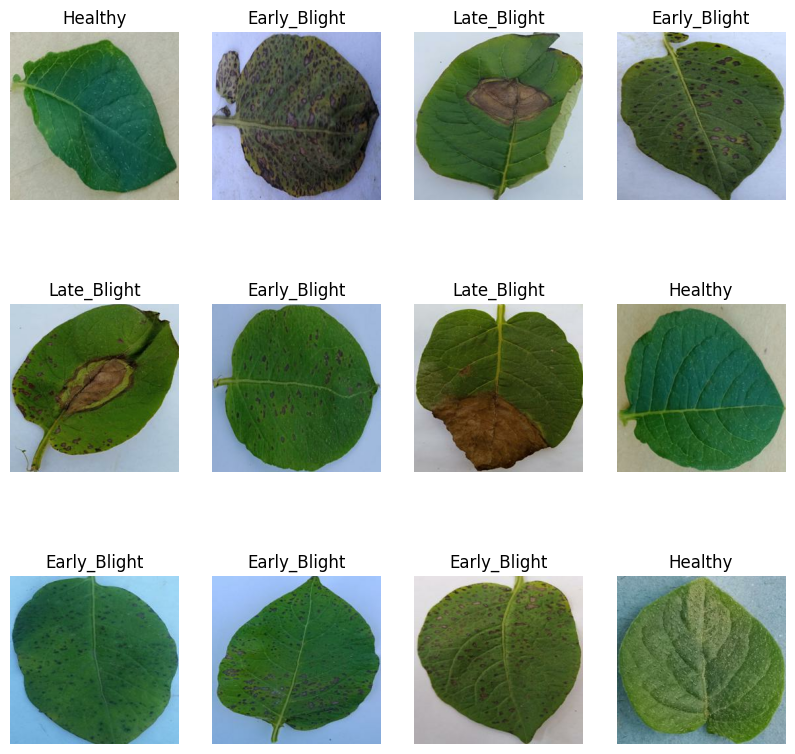

In [ ]:
print(len(dataset_train))
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset_train.take(1) :
    for i in range(12) :
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

#Validation Examples

In [6]:
dataset_val = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PLD_3_Classes_256/Validation",
    shuffle = True,
    image_size = (IMAGE_SIZE_exp2, IMAGE_SIZE_exp2),
    batch_size = BATCH_SIZE_exp2
)

Found 416 files belonging to 3 classes.


In [7]:
class_names_val = dataset_val.class_names
class_names_val

['Early_Blight', 'Healthy', 'Late_Blight']

13


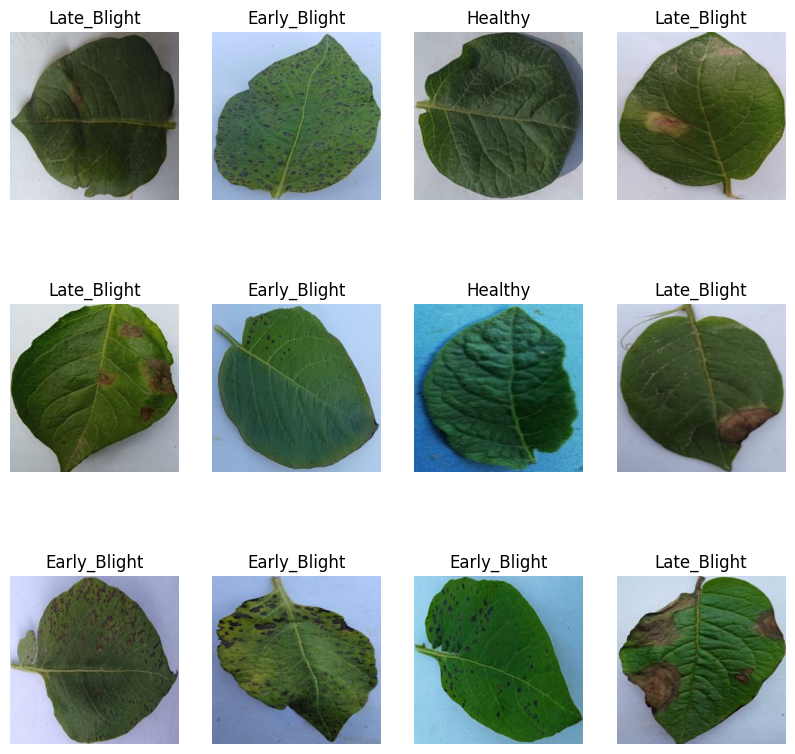

In [ ]:
print(len(dataset_val))
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset_val.take(1) :
    for i in range(12) :
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

#Testing Examples

In [8]:
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PLD_3_Classes_256/Testing",
    shuffle = True,
    image_size = (IMAGE_SIZE_exp2, IMAGE_SIZE_exp2),
    batch_size = BATCH_SIZE_exp2
)

Found 405 files belonging to 3 classes.


In [9]:
class_names_test = dataset_val.class_names
class_names_test

['Early_Blight', 'Healthy', 'Late_Blight']

13


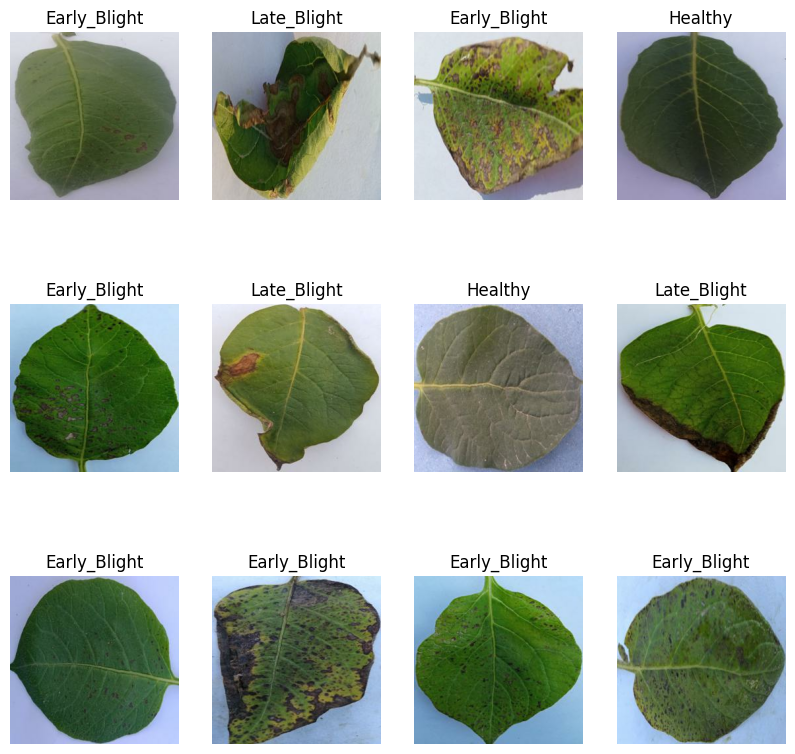

In [ ]:
print(len(dataset_test))
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset_test.take(1) :
    for i in range(12) :
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

#Training Class Distributions Plot (Bar Graph)

/content/drive/MyDrive/PLD_3_Classes_256/Training counts: {'Early_Blight': 1303, 'Healthy': 816, 'Late_Blight': 1132}


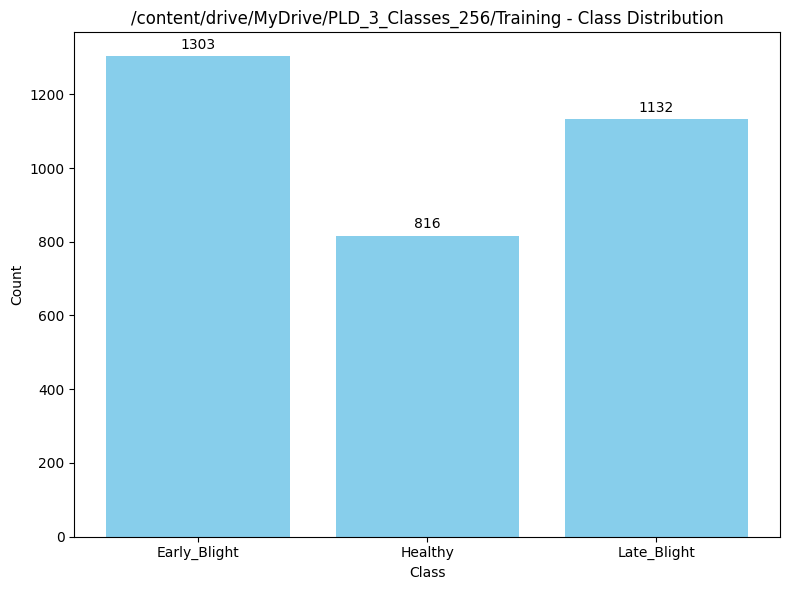

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the base directory and class names
base_dir = "/content/drive/MyDrive/PLD_3_Classes_256/Training"
class_names_train = ["Early_Blight", "Healthy", "Late_Blight"]

# Create a dictionary to store counts for each class in the base directory
counts = {}
for cls in class_names_train:
    # Create the full path for each class folder
    path = os.path.join(base_dir, cls)
    # Count only files (ignoring subdirectories if any)
    if os.path.exists(path):
        file_count = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    else:
        file_count = 0
    counts[cls] = file_count

# Print out the counts for verification
print(f"{base_dir} counts: {counts}")

# Plot a bar graph for the base directory
plt.figure(figsize=(8, 6))
plt.bar(list(counts.keys()), list(counts.values()), color='skyblue')
plt.title(f"{base_dir} - Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

# Add count labels on top of each bar
for i, count in enumerate(counts.values()):
    plt.text(i, count + max(counts.values()) * 0.01, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


#Data Augmenting and balancing from the training set classes

In [10]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Replace with the path to your "healthy" folder in Drive
healthy_dir_train_exp2 = "/content/drive/MyDrive/PLD_3_Classes_256/Training/Healthy"
# Make sure the directory exists
assert os.path.exists(healthy_dir_train_exp2), "Healthy folder path does not exist."

# Gather all image filenames in the healthy folder
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
healthy_images_train_exp2 = [
    f for f in os.listdir(healthy_dir_train_exp2)
    if f.lower().endswith(valid_extensions)
]

current_count_healthy = len(healthy_images_train_exp2)
print(f"Currently, there are {current_count_healthy} images in the Healthy folder.")

target_count_healthy = 1303  # desired total images for "Healthy"
to_generate_healthy = target_count_healthy - current_count_healthy

# Define a data generator with some augmentations
datagen_training_healthy = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


Currently, there are 816 images in the Healthy folder.


In [ ]:
import uuid
if to_generate_healthy > 0:
    print(f"Generating {to_generate_healthy} augmented images...")

    # Function to augment a single image and save the result
    def augment_image(image_path, save_dir):
      img = load_img(image_path)            # Load the image
      x = img_to_array(img)                 # Convert to numpy array
      x = np.expand_dims(x, axis=0)         # Add batch dimension

      # Generate a unique prefix for this augmentation
      unique_prefix = f"aug_{uuid.uuid4().hex[:8]}"

      # Generate a batch of augmented images (we only need one)
      aug_iter = datagen_training_healthy.flow(
        x,
        batch_size=1,
        save_to_dir=save_dir,
        save_prefix=unique_prefix,  # Use unique prefix
        save_format="jpg"           # Save format
    )

      # Generate exactly 1 augmented image using the built-in next()
      next(aug_iter)


    for i in range(to_generate_healthy):
        # Pick a random image from the existing healthy set
        random_img_train_healthy_exp2 = random.choice(healthy_images_train_exp2)
        random_img_path_train_healthy_exp2 = os.path.join(healthy_dir_train_exp2, random_img_train_healthy_exp2)

        # Generate and save 1 augmented image
        augment_image(random_img_path_train_healthy_exp2, healthy_dir_train_exp2)

    print("Augmentation complete.")
else:
    print("No augmentation needed; you already have 1303 or more images.")


Generating 487 augmented images...
Augmentation complete.


In [ ]:
# Replace with the path to your "Late_Blight" folder in Drive
late_blight_dir_train_exp2 = "/content/drive/MyDrive/PLD_3_Classes_256/Training/Late_Blight"
# Make sure the directory exists
assert os.path.exists(late_blight_dir_train_exp2), "Late_Blight folder path does not exist."

# Gather all image filenames in the Late_Blight folder
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
late_blight_images_train_exp2 = [
    f for f in os.listdir(late_blight_dir_train_exp2)
    if f.lower().endswith(valid_extensions)
]

current_count_late_blight = len(late_blight_images_train_exp2)
print(f"Currently, there are {current_count_late_blight} images in the Late_Blight folder.")

target_count_late_blight = 1303  # desired total images for "Late_Blight"
to_generate_late_blight = target_count_late_blight - current_count_late_blight

# Define a data generator with the same augmentations for Late_Blight
datagen_training_late_blight = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


Currently, there are 1132 images in the Late_Blight folder.


In [ ]:
if to_generate_late_blight > 0:
    print(f"Generating {to_generate_late_blight} augmented images for Late_Blight...")

    # Function to augment a single image and save the result
    def augment_image(image_path, save_dir):
        img = load_img(image_path)            # Load the image
        x = img_to_array(img)                 # Convert to numpy array
        x = np.expand_dims(x, axis=0)         # Add batch dimension

        # Generate a unique prefix for this augmentation
        unique_prefix = f"aug_{uuid.uuid4().hex[:8]}"

        # Generate a batch of augmented images (we only need one)
        aug_iter = datagen_training_late_blight.flow(
            x,
            batch_size=1,
            save_to_dir=save_dir,
            save_prefix=unique_prefix,  # Use unique prefix
            save_format="jpg"           # Save format
        )

        # Generate exactly 1 augmented image using the built-in next()
        next(aug_iter)

    for i in range(to_generate_late_blight):
        # Pick a random image from the existing Late_Blight set
        random_img_train_late_blight = random.choice(late_blight_images_train_exp2)
        random_img_path_train_late_blight = os.path.join(late_blight_dir_train_exp2, random_img_train_late_blight)

        # Generate and save 1 augmented image
        augment_image(random_img_path_train_late_blight, late_blight_dir_train_exp2)

    print("Late_Blight augmentation complete.")
else:
    print("No augmentation needed for Late_Blight; you already have 1303 or more images.")

Generating 171 augmented images for Late_Blight...
Late_Blight augmentation complete.


#Class Distributions of Training set after augmenting and balancing dataset

/content/drive/MyDrive/PLD_3_Classes_256/Training counts: {'Early_Blight': 1303, 'Healthy': 1303, 'Late_Blight': 1303}


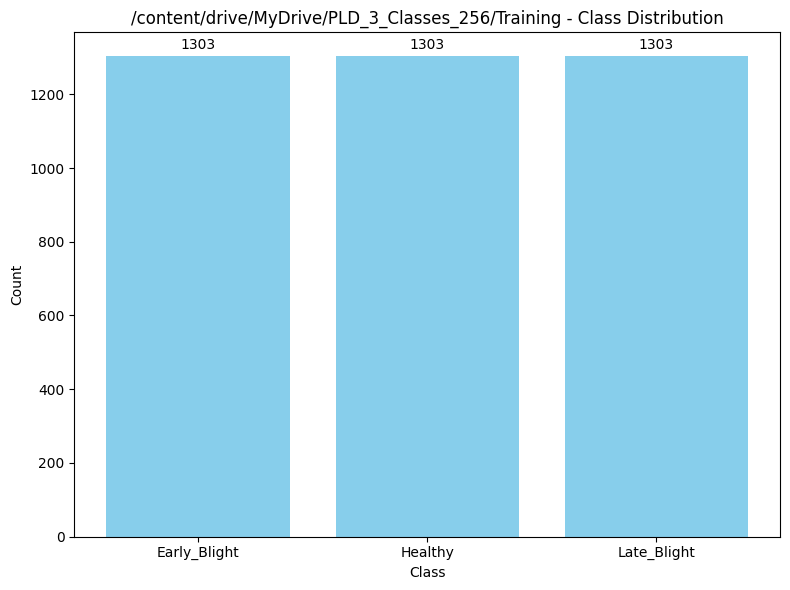

In [14]:
import os
import matplotlib.pyplot as plt

# Define the base directory and class names
base_dir = "/content/drive/MyDrive/PLD_3_Classes_256/Training"
class_names_train = ["Early_Blight", "Healthy", "Late_Blight"]

# Create a dictionary to store counts for each class in the base directory
counts = {}
for cls in class_names_train:
    # Create the full path for each class folder
    path = os.path.join(base_dir, cls)
    # Count only files (ignoring subdirectories if any)
    if os.path.exists(path):
        file_count = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    else:
        file_count = 0
    counts[cls] = file_count

# Print out the counts for verification
print(f"{base_dir} counts: {counts}")

# Plot a bar graph for the base directory
plt.figure(figsize=(8, 6))
plt.bar(list(counts.keys()), list(counts.values()), color='skyblue')
plt.title(f"{base_dir} - Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

# Add count labels on top of each bar
for i, count in enumerate(counts.values()):
    plt.text(i, count + max(counts.values()) * 0.01, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


#Validation Class Distributions Plot (Bar Graph)

/content/drive/MyDrive/PLD_3_Classes_256/Validation counts: {'Early_Blight': 163, 'Healthy': 102, 'Late_Blight': 151}


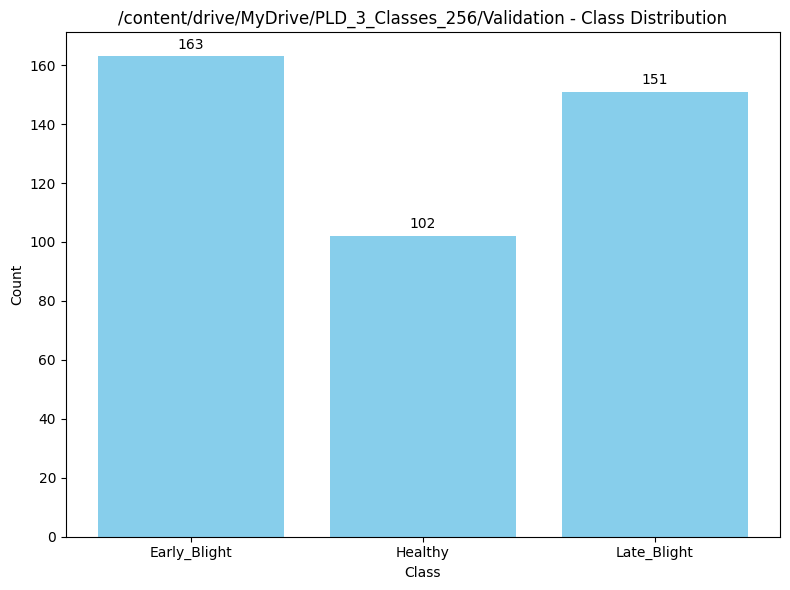

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the base directory and class names
base_dir = "/content/drive/MyDrive/PLD_3_Classes_256/Validation"
class_names_train = ["Early_Blight", "Healthy", "Late_Blight"]

# Create a dictionary to store counts for each class in the base directory
counts = {}
for cls in class_names_train:
    # Create the full path for each class folder
    path = os.path.join(base_dir, cls)
    # Count only files (ignoring subdirectories if any)
    if os.path.exists(path):
        file_count = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    else:
        file_count = 0
    counts[cls] = file_count

# Print out the counts for verification
print(f"{base_dir} counts: {counts}")

# Plot a bar graph for the base directory
plt.figure(figsize=(8, 6))
plt.bar(list(counts.keys()), list(counts.values()), color='skyblue')
plt.title(f"{base_dir} - Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

# Add count labels on top of each bar
for i, count in enumerate(counts.values()):
    plt.text(i, count + max(counts.values()) * 0.01, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


#Test Class Distributions Plot (Bar Graph)

/content/drive/MyDrive/PLD_3_Classes_256/Testing counts: {'Early_Blight': 162, 'Healthy': 102, 'Late_Blight': 141}


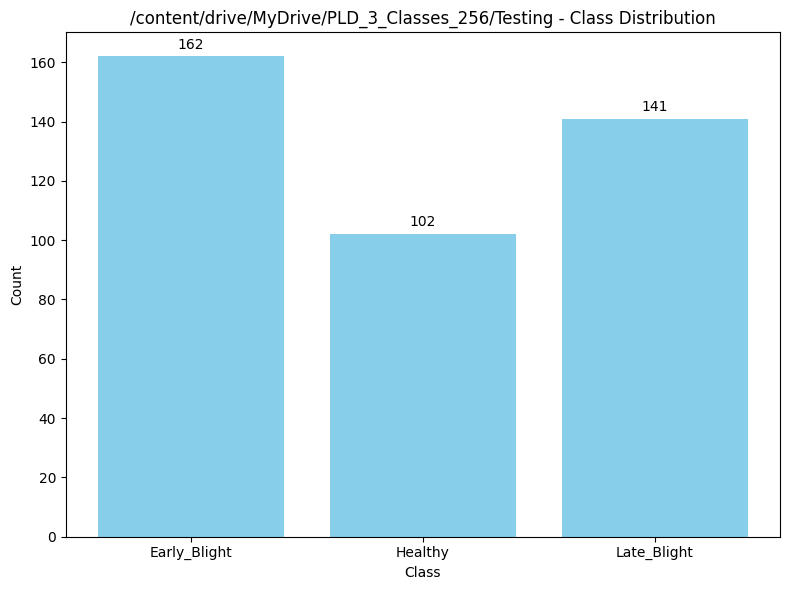

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the base directory and class names
base_dir = "/content/drive/MyDrive/PLD_3_Classes_256/Testing"
class_names_train = ["Early_Blight", "Healthy", "Late_Blight"]

# Create a dictionary to store counts for each class in the base directory
counts = {}
for cls in class_names_train:
    # Create the full path for each class folder
    path = os.path.join(base_dir, cls)
    # Count only files (ignoring subdirectories if any)
    if os.path.exists(path):
        file_count = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    else:
        file_count = 0
    counts[cls] = file_count

# Print out the counts for verification
print(f"{base_dir} counts: {counts}")

# Plot a bar graph for the base directory
plt.figure(figsize=(8, 6))
plt.bar(list(counts.keys()), list(counts.values()), color='skyblue')
plt.title(f"{base_dir} - Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

# Add count labels on top of each bar
for i, count in enumerate(counts.values()):
    plt.text(i, count + max(counts.values()) * 0.01, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [13]:
train_sample_exp2 = len(dataset_train)
train_ds_exp2 = dataset_train.take(train_sample_exp2)
print("Length of Training samples = ", len(train_ds_exp2))

valid_sample_exp2 = len(dataset_val)
val_ds_exp2 = dataset_val.take(valid_sample_exp2)
print("Length of Validation samples = ", len(val_ds_exp2))

test_sample_exp2 = len(dataset_test)
test_ds_exp2 = dataset_test.take(test_sample_exp2)
print("Length of Testing samples = ", len(test_ds_exp2))


Length of Training samples =  123
Length of Validation samples =  13
Length of Testing samples =  13


In [15]:
train_ds_exp2 = train_ds_exp2.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds_exp2 = val_ds_exp2.cache().prefetch(buffer_size=tf.data.AUTOTUNE)  # No shuffling needed
test_ds_exp2 = test_ds_exp2.cache().prefetch(buffer_size=tf.data.AUTOTUNE)  # No shuffling needed

In [16]:
resize_and_rescale_exp2 = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE_exp2, IMAGE_SIZE_exp2),
    layers.Rescaling(1.0 / 255)
])

In [17]:
data_augmentation_exp2 = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

#Data augmentation is a technique used in machine learning, particularly in computer vision tasks,
#to artificially increase the diversity of the training dataset.
#By applying random transformations to the images, data augmentation helps improve the robustness and generalization ability of a model.

In [18]:
input_shape_exp2 = (BATCH_SIZE_exp2, IMAGE_SIZE_exp2, IMAGE_SIZE_exp2, CHANNELS_exp2)
n_classes_exp2 = 3

model_exp2 = models.Sequential([
    resize_and_rescale_exp2,
    data_augmentation_exp2,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape_exp2),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes_exp2, activation = 'softmax'),
])

model_exp2.build(input_shape = input_shape_exp2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model_exp2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 2304)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_exp2.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

EPOCHS_exp2 = 50

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping if val_loss stops improving
early_stop_loss_exp2 = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

# Early stopping if val_accuracy stops improving
early_stop_acc_exp2 = EarlyStopping(
    monitor='val_accuracy',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

history_exp2 = model_exp2.fit(
    train_ds_exp2,
    epochs=EPOCHS_exp2,
    batch_size=BATCH_SIZE_exp2,
    verbose=1,
    validation_data=val_ds_exp2,
    callbacks=[early_stop_loss_exp2, early_stop_acc_exp2]
)


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 864s 681ms/step - accuracy: 0.4281 - loss: 1.0281 - val_accuracy: 0.5096 - val_loss: 0.9349
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.5905 - loss: 0.8828 - val_accuracy: 0.5457 - val_loss: 0.9549
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.6135 - loss: 0.8231 - val_accuracy: 0.6058 - val_loss: 0.8946
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.6993 - loss: 0.7258 - val_accuracy: 0.7596 - val_loss: 0.5934
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.7949 - loss: 0.5064 - val_accuracy: 0.8269 - val_loss: 0.4474
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.8352 - loss: 0.4075 - val_accuracy: 0.8149 - val_loss: 0.4736
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.8963 - loss: 0.2847 - val_accuracy: 0.9062 - val_loss: 0.2447
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9078 - loss: 0.2655 - val

In [23]:
scores_exp2 = model_exp2.evaluate(test_ds_exp2)

13/13 ━━━━━━━━━━━━━━━━━━━━ 85s 6s/step - accuracy: 0.9805 - loss: 0.0770


In [24]:
scores_exp2

[0.08311720192432404, 0.980246901512146]

In [25]:
history_exp2
history_exp2.params

{'verbose': 1, 'epochs': 50, 'steps': 123}

In [26]:
history_exp2.history.keys()
history_exp2.history['accuracy']

[0.4985930025577545,
 0.5952929258346558,
 0.6313635110855103,
 0.70376056432724,
 0.8112049102783203,
 0.8434382081031799,
 0.8994627594947815,
 0.9135328531265259,
 0.930928647518158,
 0.9370682835578918,
 0.9485802054405212,
 0.9570222496986389,
 0.9662317633628845,
 0.9547199010848999,
 0.9667434096336365,
 0.9664875864982605,
 0.9751854538917542,
 0.9657201170921326,
 0.9746738076210022,
 0.9756971001625061,
 0.9810693264007568,
 0.9810693264007568,
 0.9826042652130127,
 0.9803018569946289,
 0.977232038974762,
 0.9861857295036316,
 0.9836274981498718,
 0.9810693264007568,
 0.9820926189422607,
 0.9826042652130127,
 0.9826042652130127,
 0.9833717346191406,
 0.9874648451805115,
 0.9805576801300049,
 0.9854182600975037,
 0.9864415526390076]

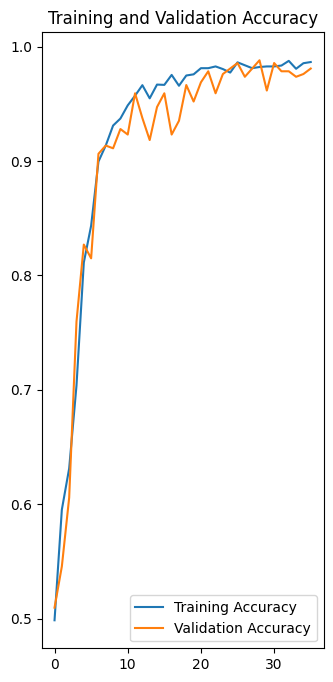

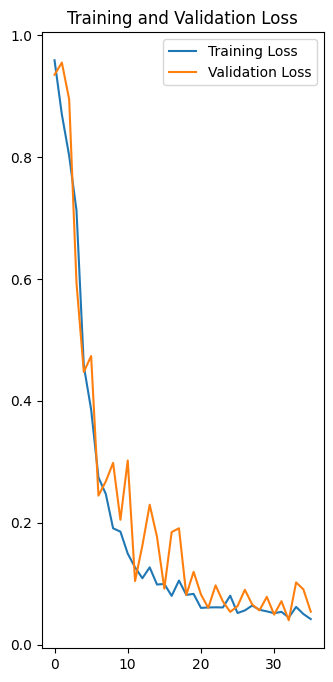

In [27]:
acc_exp2 = history_exp2.history['accuracy']
val_acc_exp2 = history_exp2.history['val_accuracy']

loss_exp2 = history_exp2.history['loss']
val_loss_exp2 = history_exp2.history['val_loss']

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(36), acc_exp2, label = 'Training Accuracy')
plt.plot(range(36), val_acc_exp2, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(36), loss_exp2, label = 'Training Loss')
plt.plot(range(36), val_loss_exp2, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
import numpy as np

y_true_exp2 = np.concatenate([y for x, y in test_ds_exp2], axis=0)

In [29]:
y_pred_probs_exp2 = model_exp2.predict(test_ds_exp2)
y_pred_exp2 = np.argmax(y_pred_probs_exp2, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true_exp2, y_pred_exp2)
print("Confusion Matrix:\n", cm)

report = classification_report(y_true_exp2, y_pred_exp2)
print("Classification Report:\n", report)

Confusion Matrix:
 [[156   2   4]
 [  0 101   1]
 [  0   1 140]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       162
           1       0.97      0.99      0.98       102
           2       0.97      0.99      0.98       141

    accuracy                           0.98       405
   macro avg       0.98      0.98      0.98       405
weighted avg       0.98      0.98      0.98       405



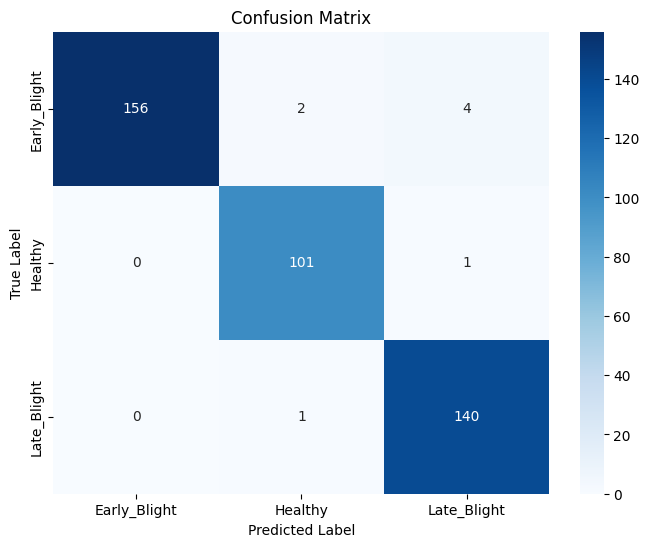

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are defined
cm = confusion_matrix(y_true_exp2, y_pred_exp2)
class_names_exp2 = ['Early_Blight', 'Healthy', 'Late_Blight']  # Replace with your actual class names

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names_exp2, yticklabels=class_names_exp2)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

First image to predict
Actual label : Early_Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Predicted label : Early_Blight


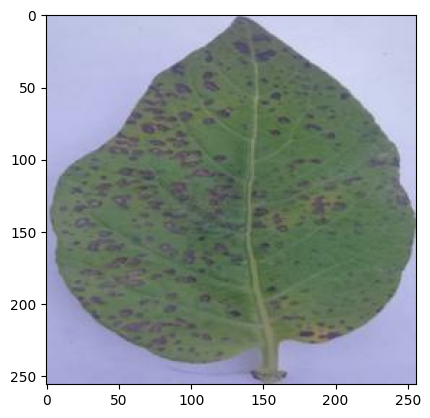

In [33]:
import numpy as np
for images_batch, labels_batch in test_ds_exp2.take(1) :

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label :", class_names_exp2[first_label])

    batch_prediction = model_exp2.predict(images_batch) #prediction for 32 images
    print("Predicted label :", class_names_exp2[np.argmax(batch_prediction[0])])  #softmax is a probability; and there are 3 probabilities
    #whatever is the highest probability; that is the class
    #np.argmax gies the index of the highest value

In [37]:
def predict(model_exp2, img) :
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch

    predictions_exp2 = model_exp2.predict(img_array)

    predicted_class_exp2 = class_names_exp2[np.argmax(predictions_exp2[0])]
    confidence_exp2 = round(100 * (np.max(predictions_exp2[0])), 2)
    return predicted_class_exp2, confidence_exp2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


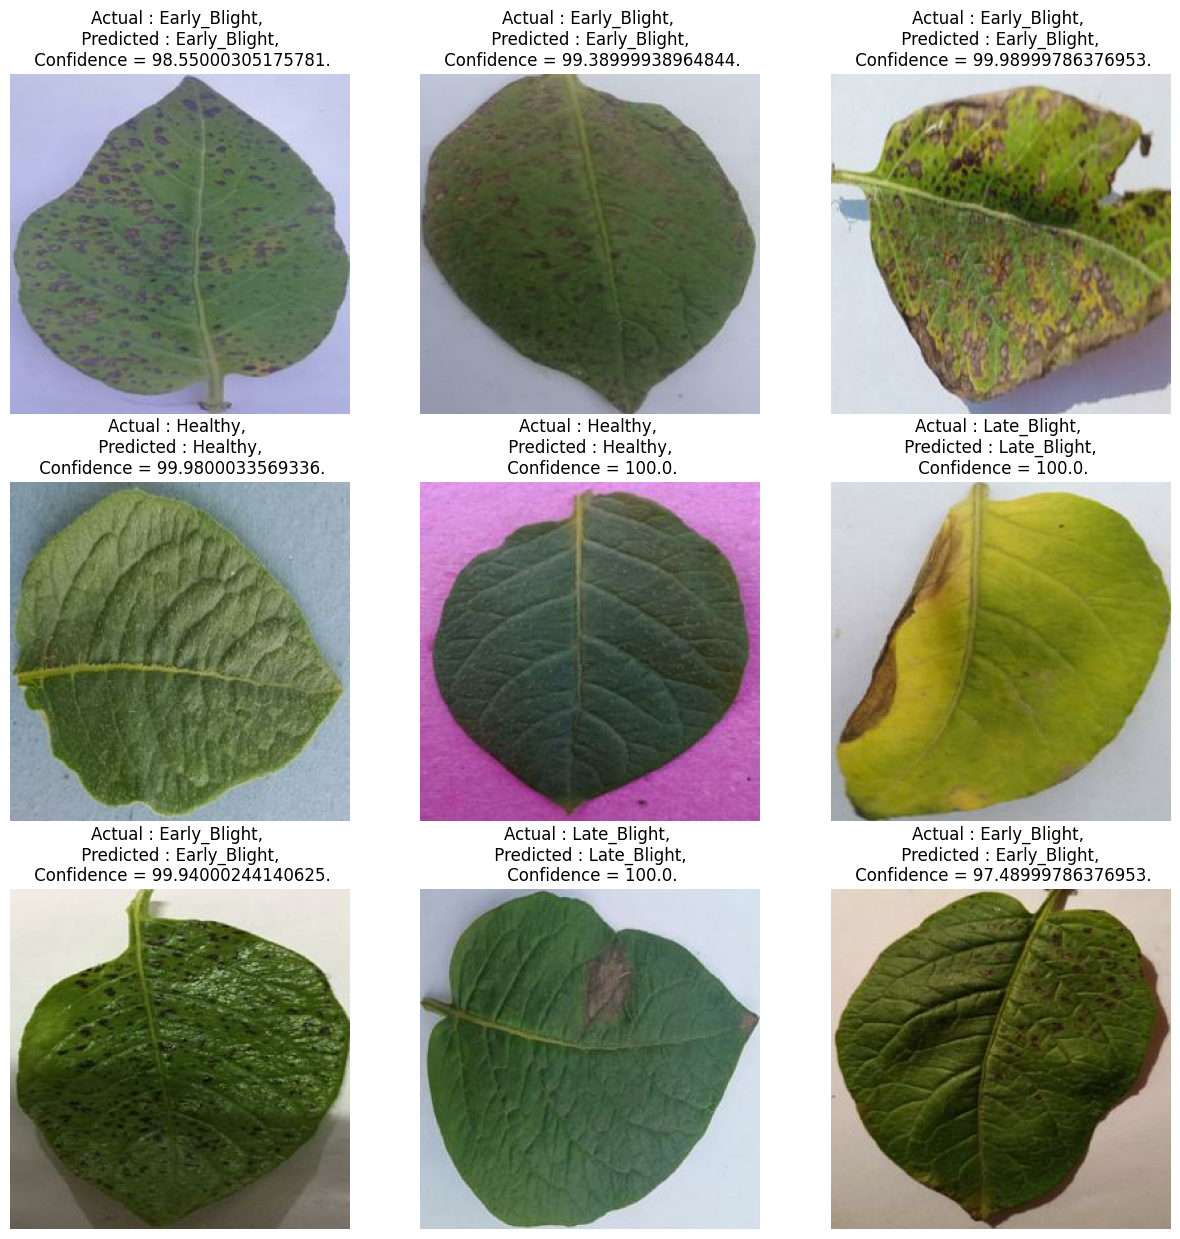

In [38]:
plt.figure(figsize = (15, 15))
for images, labels in test_ds_exp2.take(1) :
    for i in range(9) :
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class_exp2, confidence_exp2 = predict(model_exp2, images[i].numpy())
        actual_class_exp2 = class_names_exp2[labels[i]]

        plt.title(f"Actual : {actual_class_exp2}, \n Predicted : {predicted_class_exp2}, \n Confidence = {confidence_exp2}.")

        plt.axis("off")

In [ ]:
feature_extractor_exp2 = tf.keras.Model(
    inputs=model_exp2.inputs,  # Changed from inputs_exp2 to inputs
    outputs=model_exp2.layers[-3].output  # Changed from outputs_exp2 to outputs
)


In [ ]:
import numpy as np

def extract_features_exp2(dataset_train, feature_model_exp2):
    features_list_exp2 = []
    labels_list_exp2 = []
    for images, labels in dataset_train:
        # Predict to get the intermediate layer output
        batch_features = feature_model_exp2.predict(images)
        features_list_exp2.append(batch_features)
        labels_list_exp2.append(labels.numpy())
    # Combine all batches
    X = np.concatenate(features_list_exp2, axis=0)
    y = np.concatenate(labels_list_exp2, axis=0)
    return X, y

# Extract features for train, val, test sets
X_train_exp2, y_train_exp2 = extract_features_exp2(train_ds_exp2, feature_extractor_exp2)
X_val_exp2, y_val_exp2 = extract_features_exp2(val_ds_exp2, feature_extractor_exp2)
X_test_exp2, y_test_exp2 = extract_features_exp2(test_ds_exp2, feature_extractor_exp2)
print("Feature shapes:", X_train_exp2.shape, y_train_exp2.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 256, 256, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━

In [44]:
import numpy as np

np.save('X_train_exp2.npy', X_train_exp2)
np.save('y_train_exp2.npy', y_train_exp2)
np.save('X_val_exp2.npy', X_val_exp2)
np.save('y_val_exp2.npy', y_val_exp2)
np.save('X_test_exp2.npy', X_test_exp2)
np.save('y_test_exp2.npy', y_test_exp2)

In [45]:
import numpy as np

X_train_exp2 = np.load('X_train_exp2.npy')
y_train_exp2 = np.load('y_train_exp2.npy')
X_val_exp2 = np.load('X_val_exp2.npy')
y_val_exp2 = np.load('y_val_exp2.npy')
X_test_exp2 = np.load('X_test_exp2.npy')
y_test_exp2 = np.load('y_test_exp2.npy')


Random Forest Validation Accuracy: 0.9615384615384616
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       163
           1       0.94      1.00      0.97       102
           2       0.98      0.94      0.96       151

    accuracy                           0.96       416
   macro avg       0.96      0.97      0.96       416
weighted avg       0.96      0.96      0.96       416



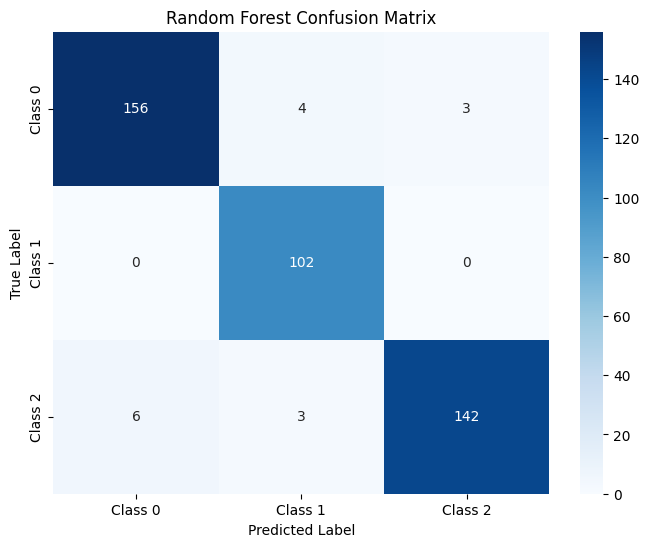

SVM Validation Accuracy: 0.9663461538461539
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       163
           1       0.93      0.99      0.96       102
           2       0.99      0.97      0.98       151

    accuracy                           0.97       416
   macro avg       0.96      0.97      0.97       416
weighted avg       0.97      0.97      0.97       416



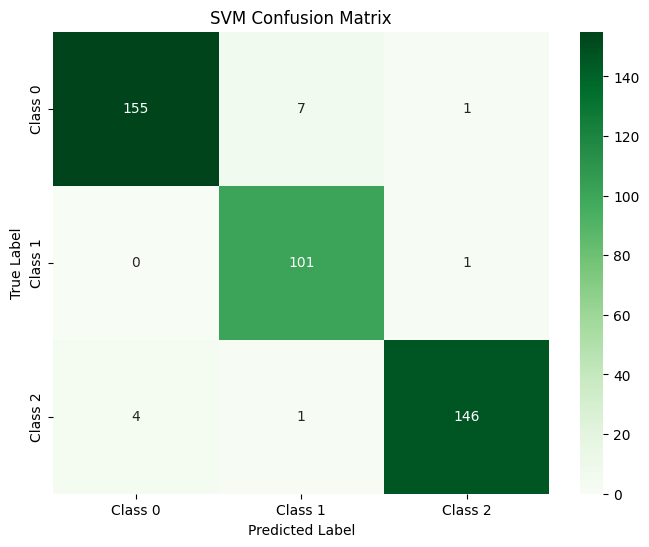

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 2.1 Random Forest
rf_clf_exp2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_exp2.fit(X_train_exp2, y_train_exp2)

# Evaluate on validation set for Random Forest
rf_val_preds_exp2 = rf_clf_exp2.predict(X_val_exp2)
rf_val_acc_exp2 = accuracy_score(y_val_exp2, rf_val_preds_exp2)
print("Random Forest Validation Accuracy:", rf_val_acc_exp2)
print("Classification Report for Random Forest:")
print(classification_report(y_val_exp2, rf_val_preds_exp2))

# Compute and plot confusion matrix for Random Forest
cm_rf_exp2 = confusion_matrix(y_val_exp2, rf_val_preds_exp2)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf_exp2, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"Class {i}" for i in range(n_classes_exp2)],
            yticklabels=[f"Class {i}" for i in range(n_classes_exp2)])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ------------------------------
# 2.2 SVM
svm_clf_exp2 = SVC(kernel='rbf', random_state=42)
svm_clf_exp2.fit(X_train_exp2, y_train_exp2)

# Evaluate on validation set for SVM
svm_val_preds_exp2 = svm_clf_exp2.predict(X_val_exp2)
svm_val_acc_exp2 = accuracy_score(y_val_exp2, svm_val_preds_exp2)
print("SVM Validation Accuracy:", svm_val_acc_exp2)
print("Classification Report for SVM:")
print(classification_report(y_val_exp2, svm_val_preds_exp2))

# Compute and plot confusion matrix for SVM
cm_svm_exp2 = confusion_matrix(y_val_exp2, svm_val_preds_exp2)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm_exp2, annot=True, fmt='d', cmap='Greens',
            xticklabels=[f"Class {i}" for i in range(n_classes_exp2)],
            yticklabels=[f"Class {i}" for i in range(n_classes_exp2)])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Random Forest Test Accuracy: 0.9580246913580247
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       162
           1       0.92      0.99      0.95       102
           2       0.96      0.96      0.96       141

    accuracy                           0.96       405
   macro avg       0.95      0.96      0.96       405
weighted avg       0.96      0.96      0.96       405



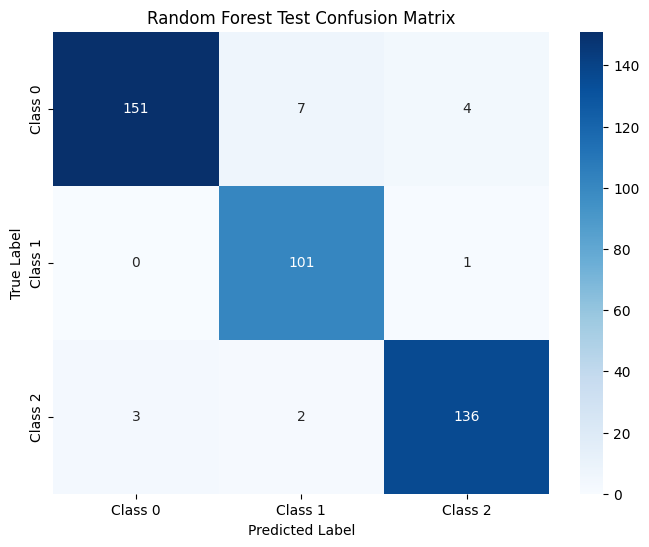

SVM Test Accuracy: 0.9629629629629629
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       162
           1       0.94      0.97      0.96       102
           2       0.95      0.98      0.97       141

    accuracy                           0.96       405
   macro avg       0.96      0.96      0.96       405
weighted avg       0.96      0.96      0.96       405



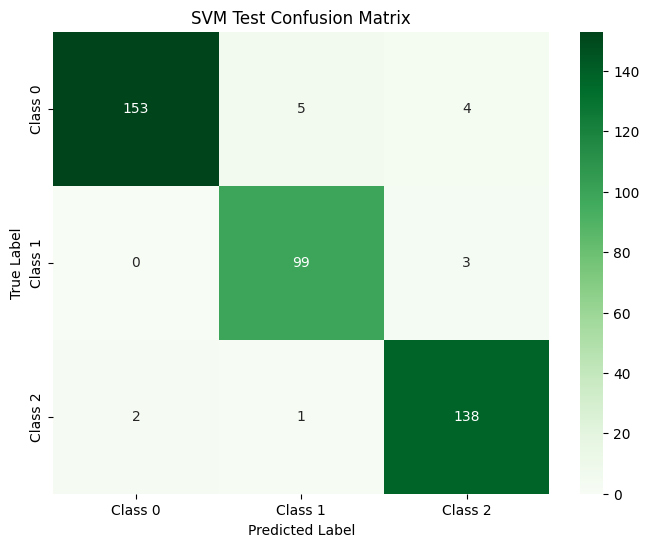

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Evaluate Random Forest on Test Set
rf_test_preds_exp2 = rf_clf_exp2.predict(X_test_exp2)
rf_test_acc_exp2 = accuracy_score(y_test_exp2, rf_test_preds_exp2)
print("Random Forest Test Accuracy:", rf_test_acc_exp2)
print("Classification Report (Random Forest):\n", classification_report(y_test_exp2, rf_test_preds_exp2))

# Compute and plot confusion matrix for Random Forest
cm_rf_test_exp2 = confusion_matrix(y_test_exp2, rf_test_preds_exp2)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf_test_exp2, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"Class {i}" for i in range(n_classes_exp2)],
            yticklabels=[f"Class {i}" for i in range(n_classes_exp2)])
plt.title("Random Forest Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ------------------------------
# Evaluate SVM on Test Set
svm_test_preds_exp2 = svm_clf_exp2.predict(X_test_exp2)
svm_test_acc_exp2 = accuracy_score(y_test_exp2, svm_test_preds_exp2)
print("SVM Test Accuracy:", svm_test_acc_exp2)
print("Classification Report (SVM):\n", classification_report(y_test_exp2, svm_test_preds_exp2))

# Compute and plot confusion matrix for SVM
cm_svm_test_exp2 = confusion_matrix(y_test_exp2, svm_test_preds_exp2)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm_test_exp2, annot=True, fmt='d', cmap='Greens',
            xticklabels=[f"Class {i}" for i in range(n_classes_exp2)],
            yticklabels=[f"Class {i}" for i in range(n_classes_exp2)])
plt.title("SVM Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
save_dir_exp2 = '/content/drive/My Drive/MODEL'
model_exp2_save_path = os.path.join(save_dir_exp2, 'model_98_PLD.h5')
model_exp2.save(model_exp2_save_path)  # This saves in the TensorFlow SavedModel format